# Horvath probe location

author: steeve.laquitaine@epfl.ch  
date: 22.08.2023  
last modified: 18.01.2024  

## Setup 

Create and activate `npx_10m_384ch_unit_classes`

In [1]:
# SET PACKAGES
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import pandas as pd
import h5py
import MEAutility as MEA
from sklearn.decomposition import PCA
import spikeinterface as si

pd.set_option('display.max_colwidth', None)

# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023/"

os.chdir(PROJ_PATH)
from src.nodes.utils import get_config
from src.nodes.dataeng.silico.filtering import get_hex_01_cells, filter_microcircuit_cells
from src.nodes.utils import write_metadata
from src.nodes.dataeng.silico import probe_wiring
from src.nodes import viz 


# SETUP CONFIG
data_conf, param_conf = get_config("vivo_horvath", "probe_1").values()
WIRED_PATH = data_conf["probe_wiring"]["output"]

2024-01-18 13:39:49,904 - root - utils.py - get_config - INFO - Reading experiment config.
2024-01-18 13:39:49,912 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Check against our ProbeInterface reconstruction

In [2]:
# 40 secs
# wire recording with probe
Recording = si.load_extractor(WIRED_PATH)

# get contact coordinates
Probe = Recording.get_probe()

contact_ids: None


### Plot

* 2D probe
* sites are ordered column first

In [5]:
sum(Probe.contact_positions)

array([ 6368., 45920.])

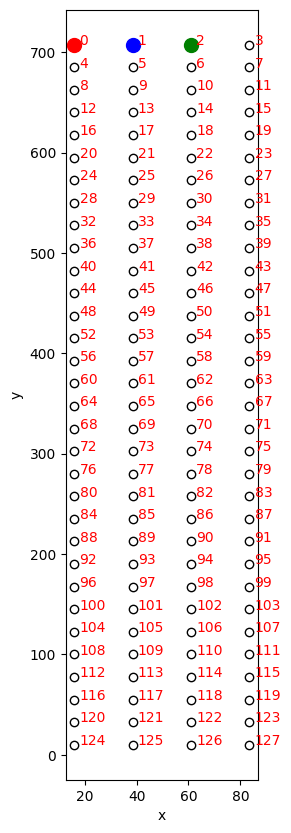

In [14]:
# plot file contact with ids
fig, ax = plt.subplots(1, figsize=(4, 10))
ax.plot(
    Probe.contact_positions[:, 0],
    Probe.contact_positions[:, 1],
    "o",
    markerfacecolor="w",
    color="k",
)
for ix in range(len(Probe.contact_positions)):
    if ix % 1 == 0:
        ax.text(
            Probe.contact_positions[ix, 0] + 2,
            Probe.contact_positions[ix, 1],
            "%s" % (str(contact_ids[ix])),
            size=10,
            zorder=100,
            color="r",
        )
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_box_aspect(4)


# highlight order
# first site
ax.plot(
    Probe.contact_positions[0, 0],
    Probe.contact_positions[0, 1],
    "ro",
    markersize=10,
)

# highlight order
# second site
ax.plot(
    Probe.contact_positions[1, 0],
    Probe.contact_positions[1, 1],
    "bo",
    markersize=10,
)

# highlight order
# third site
ax.plot(
    Probe.contact_positions[2, 0],
    Probe.contact_positions[2, 1],
    "go",
    markersize=10,
)

contact ids can be empty. In Kilosort3 they are ordered according to the rows of the contacts coordinates rows and assigned labels 1:384

In [20]:
print("channel ids: \n", Recording.get_channel_ids())

print("contact_ids:", Probe.contact_ids)

channel ids: 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128]
contact_ids: None


# References

(1) https://bbpgitlab.epfl.ch/nse/bluepy/-/blob/main/examples/ipython_notebooks/Usecase%201%20-%20Selecting%20cells%20from%20a%20circuit.ipynb 

(2) https://bbpteam.epfl.ch/documentation/projects/bluepy/latest/index.html 

(3) https://bbpteam.epfl.ch/documentation/projects/bluepy/latest/circuit.html 